# 이벤트 발생 데이터 구조 미리보기

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
rack_2018_11 = pd.read_csv(r'.\dataset\parsing_dataset\racks_2_2018_11.csv')

In [15]:
# rack_0_2018_11.info()

In [16]:
rack_2018_11.Time = pd.to_datetime(rack_2018_11.Time)

In [17]:
fire_data = rack_2018_11[rack_2018_11.Time >= pd.Timestamp("2018-11-12 00:00:00")].copy()
fire_data.Time = fire_data.Time.apply(lambda x: x.strftime('%H:%M:%S'))

In [18]:
fire_data

,Time,Tmp,TmpMax,TmpMin,TmpMinMaxLoc,VCell,VCellMax,VCellMin,VCellMinMaxLoc,NModOn,...,EvtVnd3,SoC,SoH,StEvtVnd,StVnd,V,W,WChaMax,WDisChaMax,EvtVnd2
15755,00:00:00,26.5,27.5,26.0,"{'max': 34, 'min': 1}",3.412,3.448,3.378,"{'max': 55, 'min': 198}",65535.0,...,NaN,3.5,97.0,"{'bpu fan feedback': 'ON', 'cell balancing': '...",NPS,812.1,0.0,121800.0,81400.0,NaN
15756,00:01:00,26.5,27.5,26.0,"{'max': 34, 'min': 1}",3.412,3.448,3.378,"{'max': 55, 'min': 198}",65535.0,...,NaN,3.5,97.0,"{'bpu fan feedback': 'ON', 'cell balancing': '...",NPS,812.1,0.0,121800.0,81400.0,NaN
15757,00:02:00,26.5,27.5,26.0,"{'max': 34, 'min': 1}",3.412,3.448,3.378,"{'max': 55, 'min': 198}",65535.0,...,NaN,3.5,97.0,"{'bpu fan feedback': 'ON', 'cell balancing': '...",NPS,812.1,0.0,121800.0,81400.0,NaN
15758,00:03:00,26.5,27.5,26.0,"{'max': 34, 'min': 1}",3.412,3.448,3.378,"{'max': 55, 'min': 198}",65535.0,...,NaN,3.5,97.0,"{'bpu fan feedback': 'ON', 'cell balancing': '...",NPS,812.1,0.0,121800.0,81400.0,NaN
15759,00:04:00,26.5,27.5,26.0,"{'max': 34, 'min': 1}",3.412,3.448,3.378,"{'max': 55, 'min': 198}",65535.0,...,NaN,3.5,97.0,"{'bpu fan feedback': 'ON', 'cell balancing': '...",NPS,812.1,0.0,121800.0,81400.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16716,16:01:00,24.5,26.0,23.0,"{'max': 33, 'min': 2}",4.121,4.140,4.109,"{'max': 167, 'min': 171}",65535.0,...,NaN,96.0,97.0,"{'bpu fan feedback': 'OFF', 'cell balancing': ...",NORMAL,980.8,0.0,0.0,0.0,['Comm. Error with the BSC']
16717,16:02:00,24.5,26.0,23.0,"{'max': 33, 'min': 2}",4.121,4.140,4.109,"{'max': 167, 'min': 171}",65535.0,...,NaN,96.0,97.0,"{'bpu fan feedback': 'OFF', 'cell balancing': ...",NORMAL,980.8,0.0,0.0,0.0,['Comm. Error with the BSC']
16718,16:03:00,24.5,26.0,23.0,"{'max': 33, 'min': 2}",4.121,4.140,4.109,"{'max': 167, 'min': 171}",65535.0,...,NaN,96.0,97.0,"{'bpu fan feedback': 'OFF', 'cell balancing': ...",NORMAL,980.8,0.0,0.0,0.0,['Comm. Error with the BSC']
16719,16:04:00,24.5,26.0,23.0,"{'max': 33, 'min': 2}",4.121,4.140,4.109,"{'max': 167, 'min': 171}",65535.0,...,NaN,96.0,97.0,"{'bpu fan feedback': 'OFF', 'cell balancing': ...",NORMAL,980.8,0.0,0.0,0.0,['Comm. Error with the BSC']


In [19]:
import matplotlib.ticker as ticker

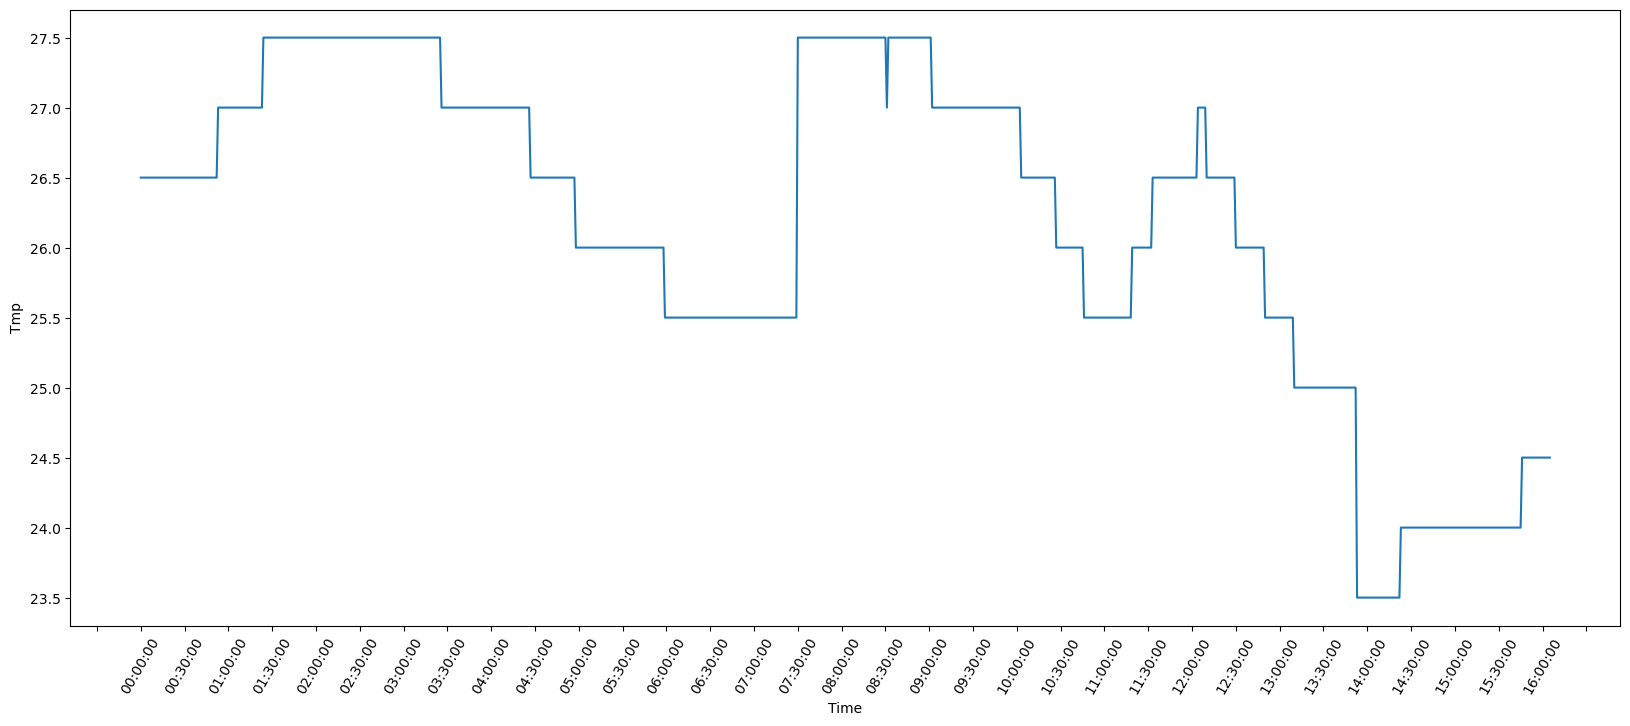

In [20]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=fire_data.loc[:, ['Time', 'Tmp']], x='Time', y='Tmp', ax=ax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.xticks(rotation=60)

plt.show()

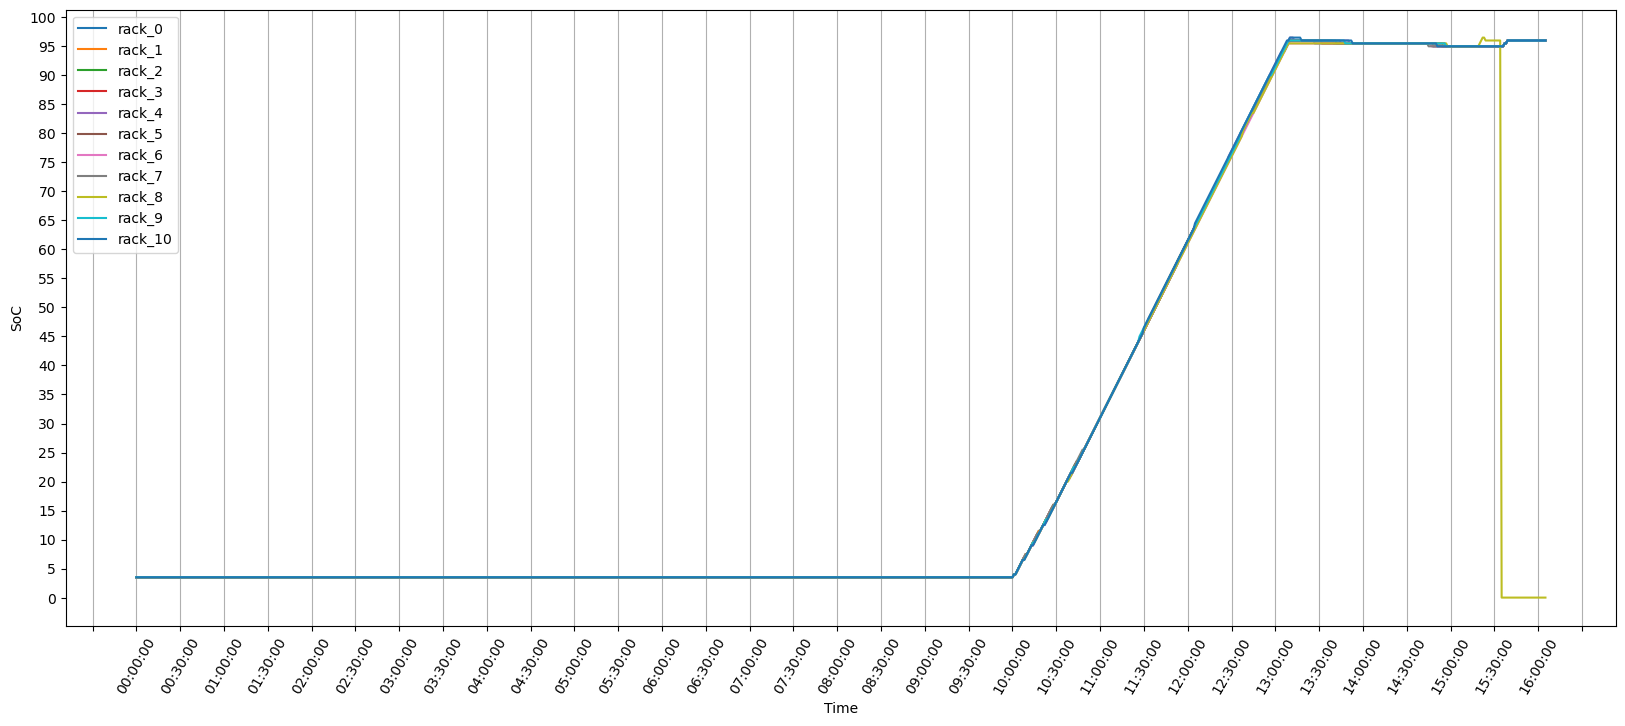

In [23]:
fig, ax = plt.subplots(figsize=(20, 8))

for i in range(11):
    Dic = r'.\dataset\parsing_dataset/'
    File = 'racks_{}_2018_11'.format(i)
    rack = pd.read_csv(Dic + File + '.csv')

    rack.Time = pd.to_datetime(rack.Time)
    fire_data = rack[rack.Time >= pd.Timestamp("2018-11-12 00:00:00")].copy()
    fire_data.Time = fire_data.Time.apply(lambda x: x.strftime('%H:%M:%S'))

    sns.lineplot(data=fire_data.loc[:, ['Time', 'SoC']], x='Time', y='SoC', ax=ax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.legend(labels=[f'rack_{i}' for i in range(11)])
ax.xaxis.grid(True)
plt.xticks(rotation=60)

plt.show()

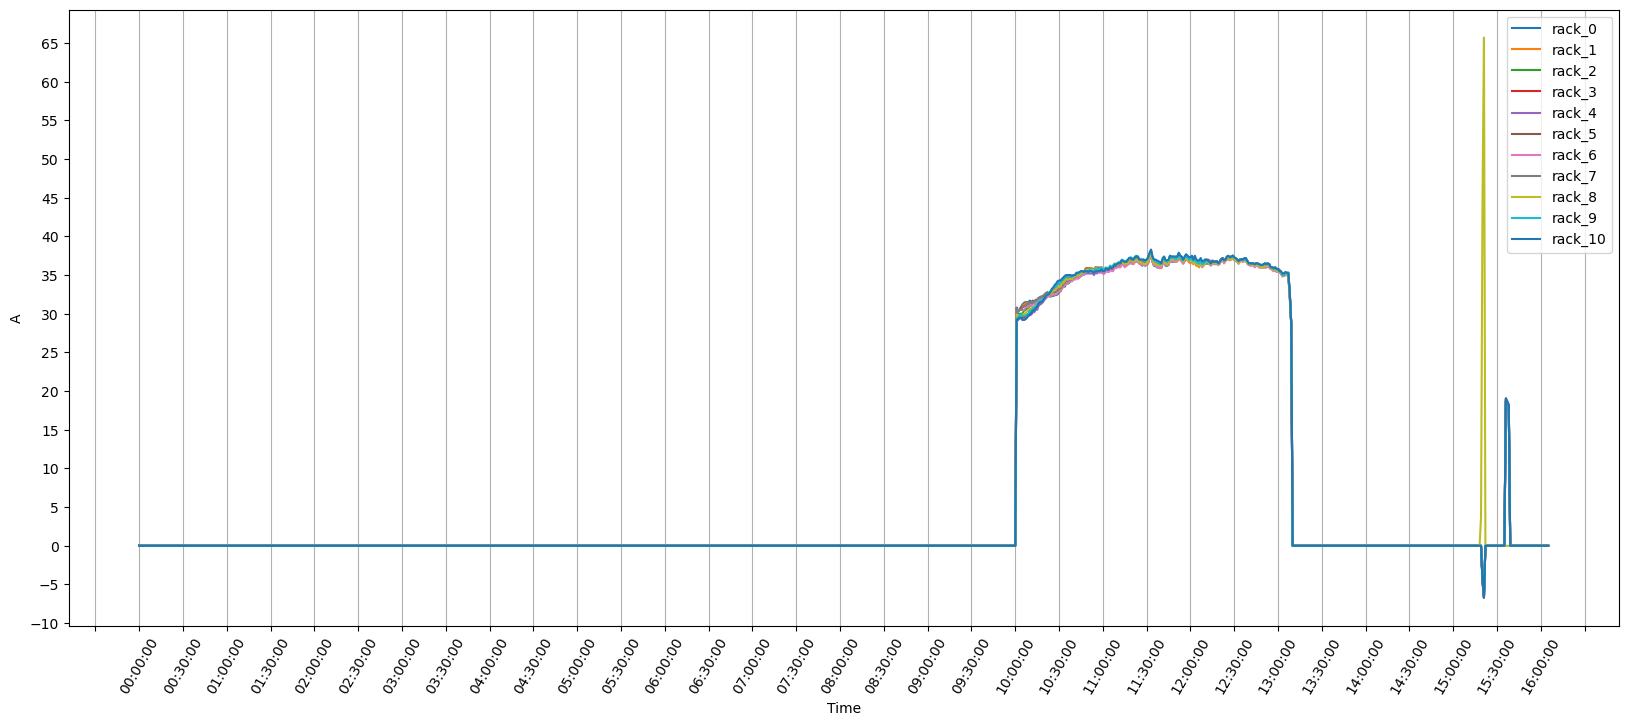

In [24]:
fig, ax = plt.subplots(figsize=(20, 8))

for i in range(11):
    Dic = r'.\dataset\parsing_dataset/'
    File = 'racks_{}_2018_11'.format(i)
    rack = pd.read_csv(Dic + File + '.csv')

    rack.Time = pd.to_datetime(rack.Time)
    fire_data = rack[rack.Time >= pd.Timestamp("2018-11-12 00:00:00")].copy()
    fire_data.Time = fire_data.Time.apply(lambda x: x.strftime('%H:%M:%S'))

    sns.lineplot(data=fire_data.loc[:, ['Time', 'A']], x='Time', y='A', ax=ax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.legend(labels=[f'rack_{i}' for i in range(11)])
ax.xaxis.grid(True)
plt.xticks(rotation=60)

plt.show()

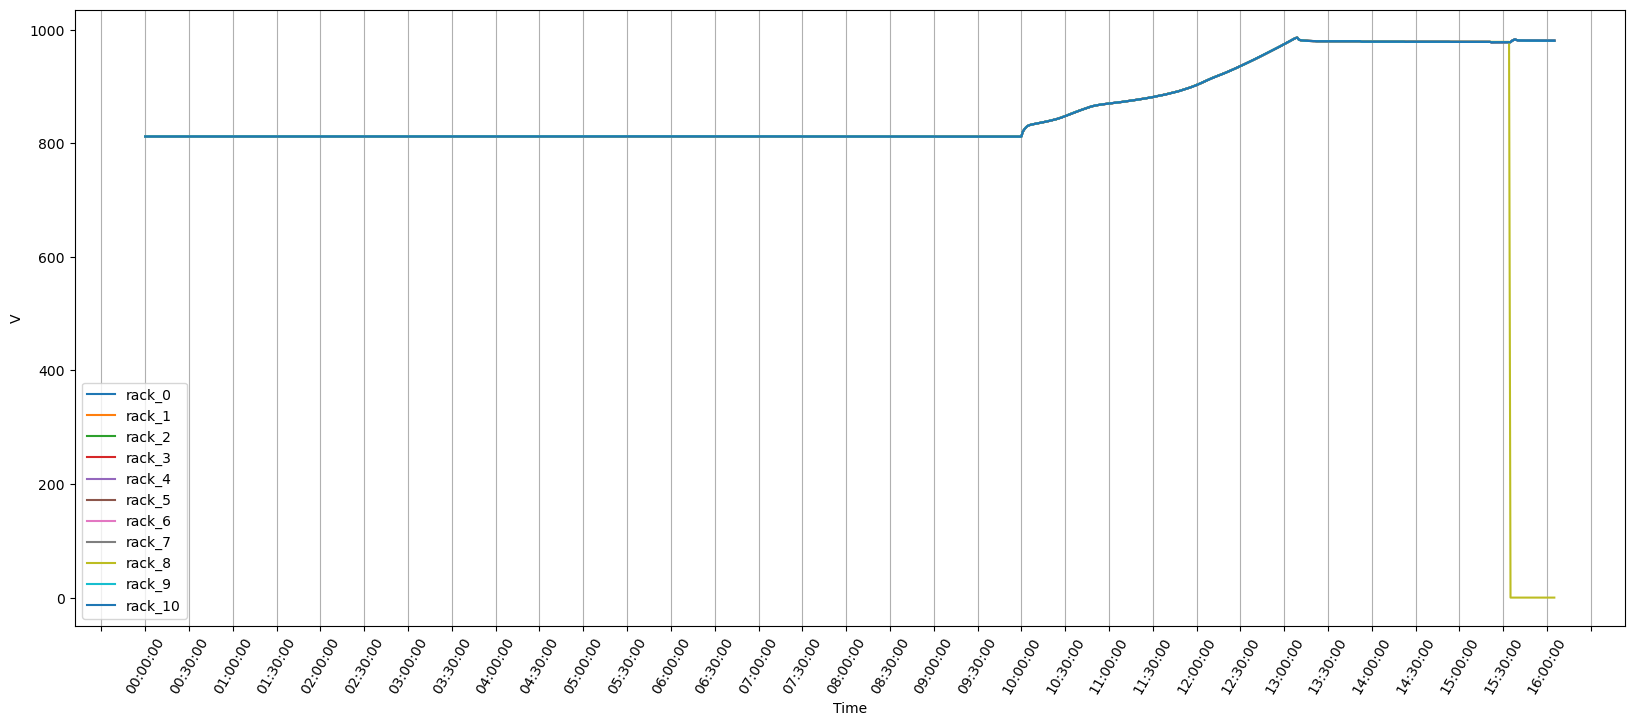

In [29]:
fig, ax = plt.subplots(figsize=(20, 8))

for i in range(11):
    Dic = r'.\dataset\parsing_dataset/'
    File = 'racks_{}_2018_11'.format(i)
    rack = pd.read_csv(Dic + File + '.csv')

    rack.Time = pd.to_datetime(rack.Time)
    fire_data = rack[rack.Time >= pd.Timestamp("2018-11-12 00:00:00")].copy()
    fire_data.Time = fire_data.Time.apply(lambda x: x.strftime('%H:%M:%S'))

    sns.lineplot(data=fire_data.loc[:, ['Time', 'V']], x='Time', y='V', ax=ax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.legend(labels=[f'rack_{i}' for i in range(11)])
ax.xaxis.grid(True)
plt.xticks(rotation=60)

plt.show()